In [3]:
import folium
from folium.plugins import HeatMap

# Sample coordinates (latitude, longitude) for the heat map
data = [
    [51.5074, -0.1278],  # London
    [48.8566, 2.3522],   # Paris
    [40.7128, -74.0060], # New York
    [34.0522, -118.2437] # Los Angeles
]

# Create a folium map object centered at a certain location (e.g., London)
m = folium.Map(location=[51.5074, -0.1278], zoom_start=5)

# Add heat map layer to the map
HeatMap(data).add_to(m)

# Save the map as an HTML file
m.save("heatmap.html")

In [2]:
!pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/c6/6e/fb6b1b2da9f4c757f55b202f10b6af0fe4fee87ace6e830228a12ab8ae5d/numpy-2.1.1-cp311-cp311-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.8 MB/s eta 0:00:00
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/4c/d3/e07ce413d16ef64e885bea37551eac4c5ca3ddd440933f9c94594273d0d9/xyzservices-2024.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━

In [5]:
import geoprop-py

SyntaxError: invalid syntax (1821746859.py, line 1)

In [8]:
from geoprop import Tiles


In [9]:
import requests
from fastapi import FastAPI
from fastapi.responses import HTMLResponse
import folium
from folium.plugins import HeatMap

app = FastAPI()

GEOJSON_URL = "http://127.0.0.1:8000/geojson"  # Replace with your actual backend URL

def fetch_geojson():
    response = requests.get(GEOJSON_URL)
    if response.status_code == 200:
        return response.json()
    return None

@app.get("/", response_class=HTMLResponse)
def generate_map():
    # Fetch GeoJSON data from the backend
    geojson_data = fetch_geojson()

    if geojson_data is None:
        return HTMLResponse(content="<h1>Error loading GeoJSON data</h1>", status_code=500)

    # Extract coordinates and weights from GeoJSON for the heatmap
    heat_data = [
        [feature['geometry']['coordinates'][1], feature['geometry']['coordinates'][0], feature['properties']['weight']]
        for feature in geojson_data['features']
    ]

    # Create a Folium map centered at a location
    m = folium.Map(location=[37.7749, -122.4194], zoom_start=5)

    # Add heatmap to the map
    HeatMap(heat_data).add_to(m)

    # Generate HTML representation of the map
    map_html = m._repr_html_()

    # Return the HTML page with the map
    return HTMLResponse(content=map_html)

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

RuntimeError: asyncio.run() cannot be called from a running event loop

In [11]:
from geoprop import Tiles, Point

tiles = Tiles("/Users/patrick/Data/srtm/3-arcsecond")
# The lowest point in the US at −86m, but note that
# SRTM isn't 100% accurate and the following call returns -84m.
badwater_basin = Point(36.250278, -116.825833)
tiles.elevation(badwater_basin)

-84

In [14]:

from geoprop import Tiles, Itm, Point, Climate

itm = Itm(tiles, climate = Climate.Desert)


# Let's generate a coverage map for a section of the Grand Canyon
center = Point(36.159600, -112.306877, 1000)
rx_alt_m = 1
h3_res = 10
freq_hz = 900e6
radius_km = 12

# Generate coverage estimates as (h3 cell, ground elevation, attenutation dBs)
grand_canyon_estimated_coverage = itm.coverage(center, h3_res, freq_hz, radius_km, rx_alt_m, rx_threshold_db = None)

In [15]:
grand_canyon_estimated_coverage

[(622228203485954047, 691.0, 68.53691510495895),
 (622228203486904319, 799.0, 87.63534196211003),
 (622228203486969855, 709.0, 86.67384385721374),
 (622228203486019583, 772.0, 86.89747784013824),
 (622228203485822975, 695.0, 87.65974344693407),
 (622228203485986815, 784.0, 88.3529634958383),
 (622228203487199231, 827.0, 88.4698769008497),
 (622228203487035391, 892.0, 110.08046938726258),
 (622228203486871551, 745.0, 108.5356096565273),
 (622228203486937087, 753.0, 109.8260041838083),
 (622228203487559679, 873.0, 108.04569222419659),
 (622228203487428607, 864.0, 109.89342004824104),
 (622228203485888511, 799.0, 109.24741190850546),
 (622228203485921279, 736.0, 110.42017843894533),
 (622228203485855743, 710.0, 108.0088408724703),
 (622228203486281727, 753.0, 111.1652456352299),
 (622228203487231999, 824.0, 109.47178797359254),
 (622228203487133695, 918.0, 110.85155505523409),
 (622228203487330303, 937.0, 109.62770112969947),
 (622228203495063551, 920.0, 114.27380140236015),
 (62222820348

In [12]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import rasterio
from rasterio.transform import from_origin

# Load your GeoJSON data
gdf = gpd.read_file('test.json')

# Extract coordinates and values
points = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
values = gdf['rssi'].values

# Create a grid covering the area of interest
grid_x, grid_y = np.mgrid[
    points[:, 0].min():points[:, 0].max():100j,
    points[:, 1].min():points[:, 1].max():100j
]

# Interpolate temperature values onto the grid
grid_values = griddata(points, values, (grid_x, grid_y), method='cubic')

# Create a raster file (GeoTIFF)
transform = from_origin(grid_x.min(), grid_y.max(), grid_x[1, 0] - grid_x[0, 0], grid_y[0, 1] - grid_y[0, 0])
with rasterio.open(
    'sample.tiff',
    'w',
    driver='GTiff',
    height=grid_values.shape[0],
    width=grid_values.shape[1],
    count=1,
    dtype=grid_values.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(grid_values, 1)

# Visualize the result
plt.imshow(grid_values, extent=(grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()), origin='lower')
plt.colorbar(label='Temperature')
plt.title('Temperature Map')
plt.show()


DataSourceError: test.json: No such file or directory

In [23]:
!pip install rasterio


  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/61/4d/5e3f94a6c002743706f87e810680e00e3a7febe3ec125e51acfe1dc75d41/rasterio-1.3.11-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for affine from https://files.pythonhosted.org/packages/0b/f7/85273299ab57117850cc0a936c64151171fac4da49bc6fba0dad984a7c5f/affine-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for cligj>=0.5 from https://files.pythonhosted.org/packages/73/86/43fa9f15c5b9fb6e82620428827cd3c284aa933431405d1bcf5231ae3d3e/cligj-0.7.2-py3-none-any.whl.metadata
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Obtaining dependency information for snuggs>=1.4.1 from https://files.pythonhosted.org/packages/cc/0e/d27d6e806d6c0d1a2cfdc5d1f088e42339a0a54a09c3343f7f81ec8947ea/snuggs-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for click-plugins from https://files.pythonhosted.org/packages/e9/da/824b92d9942f4e

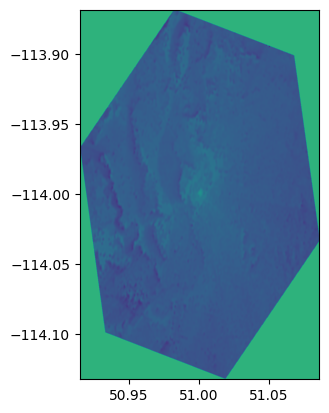

<Axes: >

In [15]:
import rasterio
from rasterio.plot import show
fp = r'sample.tiff'
img = rasterio.open(fp)
show(img)

In [ ]:
import rasterio
from rasterio.transform import from_origin

data = ...  # Your data generation logic here (e.g., numpy array)
transform = from_origin(west, north, pixel_width, pixel_height)

with rasterio.open('sample.tiff', 'w', driver='GTiff', height=data.shape[0],
                   width=data.shape[1], count=1, dtype=data.dtype, transform=transform) as dst:
    dst.write(data, 1)